In [1]:
%load_ext autoreload
%autoreload 2
from dataset import iterable_dataset, vae_feature_dataset
from models.music_generation_gru import MusicGRU
import os
from utils import training_rnn, data_reading
import torch
from torch.utils.data import DataLoader
import pickle
import matplotlib.pyplot as plt
from utils import data_reading, music_generation
from models import feature_prediction_gru
from dataset import iterable_dataset

In [2]:
FEATURE_DIRPATH = "./vae_features/piano"
TRAIN_SPLIT = 0.8
SEQ_LEN = 48
RESOLUTION = 12
TRACK_ORDER = ["Piano"]
FILES_TO_READ = 100
BATCH_SIZE = 64
LATENT_SIZE = 513
HIDDEN_SIZE = 512
N_LAYER = 3
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LR_LAMBDA = 1
LR = 0.0001
ALPHA = 0
AUTO_SAVE = False
SAVE_ON_EPOCH = 1

In [3]:
all_feature_files = data_reading.read_all_npys(FEATURE_DIRPATH, True)

In [4]:
train_len = round(len(all_feature_files)*TRAIN_SPLIT)
train_files_list = all_feature_files[:train_len]
test_files_list = all_feature_files[train_len:]

In [5]:
train_dataset = vae_feature_dataset.IterableSongDataset(train_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
test_dataset = vae_feature_dataset.IterableSongDataset(test_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, drop_last=True)

In [6]:
model = feature_prediction_gru.FeaturePredictionGRU(TRACK_ORDER, LATENT_SIZE, HIDDEN_SIZE, BATCH_SIZE, N_LAYER, DEVICE).to(DEVICE)

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: LR_LAMBDA ** epoch)
criterion = torch.nn.MSELoss()

In [8]:
EPOCH = 100
train_losses, test_losses = training_rnn.training_rnn(model, optimizer, scheduler, criterion, train_loader, test_loader, EPOCH, DEVICE, BATCH_SIZE, 
                         ALPHA, AUTO_SAVE, SAVE_ON_EPOCH)

[0.0001]
start test
Epoch 1, Train Loss: 0.23497537879553515, Test Loss: 0.21657490215518257, Time: 2022-04-25 21:49:01.485829
[0.0001]
start test
Epoch 2, Train Loss: 0.21624861690586647, Test Loss: 0.20930371311577883, Time: 2022-04-25 21:49:07.995329
[0.0001]
start test
Epoch 3, Train Loss: 0.2108616149794739, Test Loss: 0.20601837093179876, Time: 2022-04-25 21:49:14.457830
[0.0001]
start test
Epoch 4, Train Loss: 0.2077737238950434, Test Loss: 0.20401728993112392, Time: 2022-04-25 21:49:20.978829
[0.0001]
start test
Epoch 5, Train Loss: 0.20529247681915233, Test Loss: 0.2022803387858651, Time: 2022-04-25 21:49:27.490330
[0.0001]
start test
Epoch 6, Train Loss: 0.20257267580095645, Test Loss: 0.20002729405056346, Time: 2022-04-25 21:49:34.000830
[0.0001]
start test
Epoch 7, Train Loss: 0.19875925423297208, Test Loss: 0.19638002894141457, Time: 2022-04-25 21:49:40.489829
[0.0001]
start test
Epoch 8, Train Loss: 0.19401570323821718, Test Loss: 0.1930808129635724, Time: 2022-04-25 21:4

start test
Epoch 66, Train Loss: 0.08842370688783384, Test Loss: 0.16566832783547314, Time: 2022-04-25 21:56:05.109829
[0.0001]
start test
Epoch 67, Train Loss: 0.08761246566685428, Test Loss: 0.16629648411815817, Time: 2022-04-25 21:56:11.746331
[0.0001]
start test
Epoch 68, Train Loss: 0.08688051059050897, Test Loss: 0.16589026776227084, Time: 2022-04-25 21:56:18.393329
[0.0001]
start test
Epoch 69, Train Loss: 0.08599192601323655, Test Loss: 0.16639258360320872, Time: 2022-04-25 21:56:25.056329
[0.0001]
start test
Epoch 70, Train Loss: 0.08520644212520756, Test Loss: 0.16630731929432263, Time: 2022-04-25 21:56:31.720329
[0.0001]
start test
Epoch 71, Train Loss: 0.08438317423307262, Test Loss: 0.1669108424674381, Time: 2022-04-25 21:56:38.368329
[0.0001]
start test
Epoch 72, Train Loss: 0.08366781445137694, Test Loss: 0.16682235083796762, Time: 2022-04-25 21:56:44.982329
[0.0001]
start test
Epoch 73, Train Loss: 0.08293436469295912, Test Loss: 0.16689763204617933, Time: 2022-04-25 21

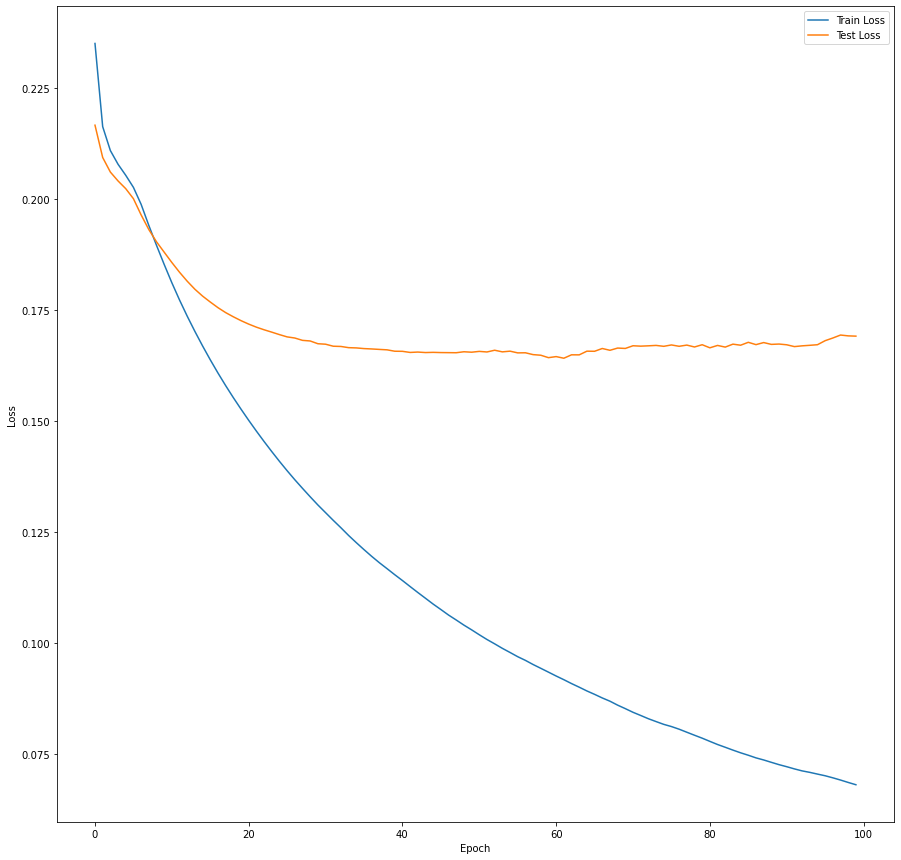

In [9]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [10]:
torch.save(model.state_dict(), "latent_learner_gru_piano_100") 